# 🔧 Movie Rating Prediction

In [2]:
# Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 💻 Upload the data

In [3]:
data=pd.read_csv("C:/Users/LENOVO/Desktop/Project/Intership/Data/IMDb Movies India.csv",encoding='ISO-8859-1')
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
# to check the info of the data
data.info()
pd.isnull(data).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

# ➡️ Handling the missing values

In [6]:
# Fill missing values
data['Director'].fillna('Unknown', inplace=True)
data['Actor 1'].fillna('Unknown', inplace=True)
data['Actor 2'].fillna('Unknown', inplace=True)
data['Actor 3'].fillna('Unknown', inplace=True)

# Drop rows with missing ratings
data.dropna(subset=['Rating'], inplace=True)


In [7]:
# check the again fo rnull values 
pd.isnull(data).sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [8]:
# Cleaning 'Year' Column
data['Year'] = data['Year'].astype(str)
data['Year'] = data['Year'].str.extract('(\d{4})')
data['Year'] = data['Year'].astype(float).astype('Int64')
data['Year'].fillna(data['Year'].median(), inplace=True)

# Cleaning 'Duration' Column
data['Duration'] = data['Duration'].astype(str)
data['Duration'] = data['Duration'].str.replace('min', '').str.strip()
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')
data['Duration'].fillna(data['Duration'].median(), inplace=True)

# Cleaning 'Votes' Column
data['Votes'] = data['Votes'].astype(str)
data['Votes'] = data['Votes'].str.replace(',', '')
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
data['Votes'].fillna(data['Votes'].median(), inplace=True)

# Final Check
print(data[['Year', 'Duration', 'Votes']].info())


<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7919 non-null   Int64  
 1   Duration  7919 non-null   float64
 2   Votes     7919 non-null   int64  
dtypes: Int64(1), float64(1), int64(1)
memory usage: 255.2 KB
None


# ➡️ Encoding Categorical Features for Movie Data Analysis

In [9]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode Genre and Director
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])
data['Director_encoded'] = label_encoder.fit_transform(data['Director'])

# Combine actors into one column for simplicity
data['Actors'] = data['Actor 1'] + ', ' + data['Actor 2'] + ', ' + data['Actor 3']
data['Actors_encoded'] = label_encoder.fit_transform(data['Actors'])


#  ➡️ Movie Rating Prediction Using Random Forest Regression

In [10]:
# Select features and target variable
X = data[['Year', 'Duration', 'Votes', 'Genre_encoded', 'Director_encoded', 'Actors_encoded']]
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')



Mean Squared Error: 1.21
R² Score: 0.35


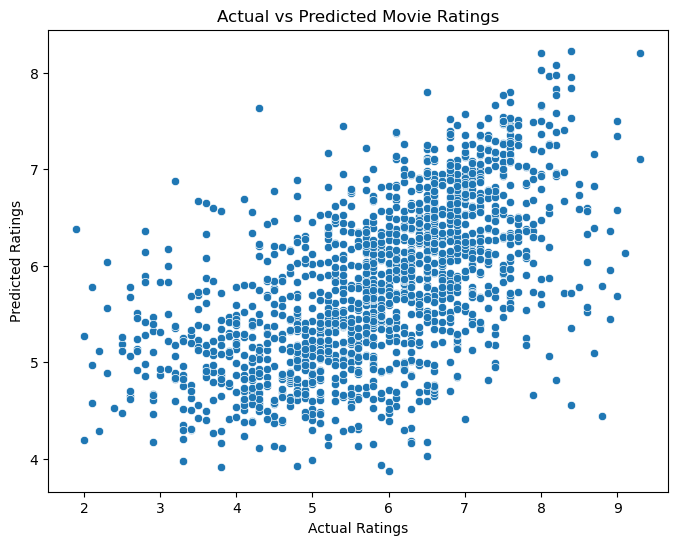

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Movie Ratings')
plt.show()


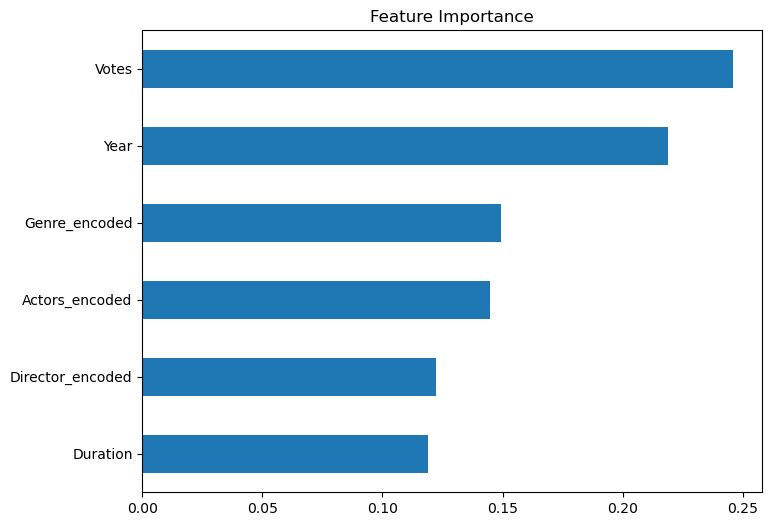

In [12]:
# Plot feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature Importance')
plt.show()


# 💾 Saving and Labeling Model Predictions for Movie Rating

In [13]:
# After cleaning and preprocessing
data.to_csv('cleaned_movie_data.csv', index=False)

print("Cleaned data saved successfully as 'cleaned_movie_data.csv'")


Cleaned data saved successfully as 'cleaned_movie_data.csv'
